# Proyek Analisis Data: [PRSA_Data_Guanyuan_20130301-20170228]
- **Nama:** Juan Anemao Sokhi Zidomi
- **Email:** juanaszidomi12@gmail.com
- **ID Dicoding:** Juan Anemao Sokhi Zidomi

## Menentukan Pertanyaan Bisnis

- Bagaimana kulitas udara di kota Guanyuan pada 5 tahun terakhir ?
- Apakah ada hubungan antara fakttor-faktor kualitas udara?
*   Bagaimana Perbandingan kualitas udara dalam 5 tahun terakhir?














## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

**Pengubahan csv menjadi Dataframe kualitas udara**

In [ ]:
airqu_df=pd.read_csv("/content/drive/MyDrive/Latihan Dicoding/Dataset/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
airqu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- Dataset kualitas udara di Kota Guanyuan dihitung setiap 1 jam
- Dataset kualitas udara memiliki 5 tahun terakhir
Dataset diatas year ,month dan day dapat di gabung

### Assessing Data

### **Pada tabel airqu**

Menampilkan tipe data setiap kolom

In [ ]:
airqu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Menampilkan nilai unique setiap kolom

In [ ]:
airqu_df.nunique()

,0
No,35064
year,5
month,12
day,31
hour,24
PM2.5,557
PM10,630
SO2,280
NO2,376
CO,117


Menampilkan deskripsi dari dataframe

In [ ]:
airqu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Pengecekan nilai duplikasi

In [ ]:
print("Jumlah data yang terduplikasi",airqu_df.duplicated().sum())

Jumlah data yang terduplikasi 0


pengecekan nilai Nan

In [ ]:
airqu_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


**Insight:**
- Di tabel diatas tidak terdapat data duplikat


*   Terdapat nilai yang missing value yang akan dilakukan di drop


*   Terdapat 3 kolom tentang datetime yaitu year, month dan day akan digabung dan diubah menjadi tipe data datetime






### Cleaning Data

Menghapus nilai NaN

In [ ]:
airqu_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


In [ ]:
airqu_df=airqu_df.dropna()

In [ ]:
airqu_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Menghapus data yang bernilai NaN supay tidak menggangu pada saat dilakukan analisis data

## Exploratory Data Analysis (EDA)

### Explore airqu_df

Melakukan grouping pada year terhadap kolom faktor lingkungan

In [ ]:
airqu_df.groupby(by="year").agg({
    "No":"nunique",
    "PM2.5":["min","max","mean"],
    "PM10":["min","max","mean"],
    "SO2":["min","max","mean"],
    "NO2":["min","max","mean"],
    "CO":["min","max","mean"],
    "TEMP":["min","max","mean"]
})

No PM2.5                   PM10                     SO2         \
     nunique   min    max       mean  min    max        mean  min    max   
year                                                                       
2013    5751   3.0  512.0  83.067467  2.0  987.0  107.101548  1.0  189.0   
2014    8213   3.0  603.0  88.292366  3.0  814.0  116.161403  1.0  263.0   
2015    8560   3.0  680.0  82.519743  3.0  961.0  106.694346  2.0  157.0   
2016    8425   3.0  639.0  77.084510  3.0  906.0  105.176736  2.0  277.0   
2017    1314   3.0  664.0  93.163623  4.0  917.0  111.456621  1.0  293.0   

                 NO2                       CO                        TEMP  \
           mean  min    max       mean    min      max         mean   min   
year                                                                        
2013  20.828850  2.0  270.0  57.120506  100.0   7100.0  1154.563380  -9.4   
2014  23.135310  2.0  230.0  63.853975  100.0   7600.0  1357.141118 -12.2   
2015  14.098353  2.0  239.0  55.005829  100.0  10000.0  1317.383178 -10.0   
2016  11.696024  2.0  225.0  53.916320  100.0   9300.0  1177.994065 -16.8   
2017  21.264079  2.0  197.0  63.547945  100.0   8100.0  1406.468798  -9.7   

                       
       max       mean  
year                   
2013  37.9  17.047522  
2014  40.5  13.924997  
2015  38.8  13.421280  
2016  37.3  13.543920  
2017  15.9   0.641936

Melakukan pengubahan column Year,Month dan day menjadi tipe data datetime

In [ ]:
airqu_df['date']=pd.to_datetime(airqu_df[['year','month','day']])

<ipython-input-23-e7c5eb0e6a88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airqu_df['date']=pd.to_datetime(airqu_df[['year','month','day']])


In [ ]:
airqu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01


Melakukan perhitungan arah mata angin di Kota GuanYuan

In [ ]:
airqu_df.groupby(by=["year","wd"]).agg({
    "No":"count"
})


No
year wd       
2013 E     259
     ENE   422
     ESE   168
     N     456
     NE   1007
...        ...
2017 SSW    23
     SW    169
     W      21
     WNW    24
     WSW    53

[80 rows x 1 columns]

**Insight:**
- Mendapatkan nilai max,min dan mean dari nilai PM2.5, PM10, SO2, NO2, CO, O3, TEMP yang hitung 5 tahun terahir
- Melakukan penambahan kolom baru yaitu date dengan cara menggabungakan kolom year,month dan day


*   Melakukan grouping untuk mengetahui arah mata angin paling banyak di 5 tahun terakhir



In [ ]:
airqu_df.to_csv("clean.csv",index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana kulitas udara di kota Guanyuan pada 5 tahun terakhir ?

Mengambil nilai setiap tahun dari kolom year

In [ ]:
airqu_df["year"].unique()

array([2013, 2014, 2015, 2016, 2017])

Melakukan grouping

In [ ]:
visual=airqu_df.groupby(by=["year","month"]).agg({
    "PM2.5":"mean",
    "PM10":"mean",
    "SO2":"mean",
    "CO":"mean",
    "O3":"mean",
    "NO2":"mean",
    "TEMP":"mean"
})

Visualisasi Tahun 2013

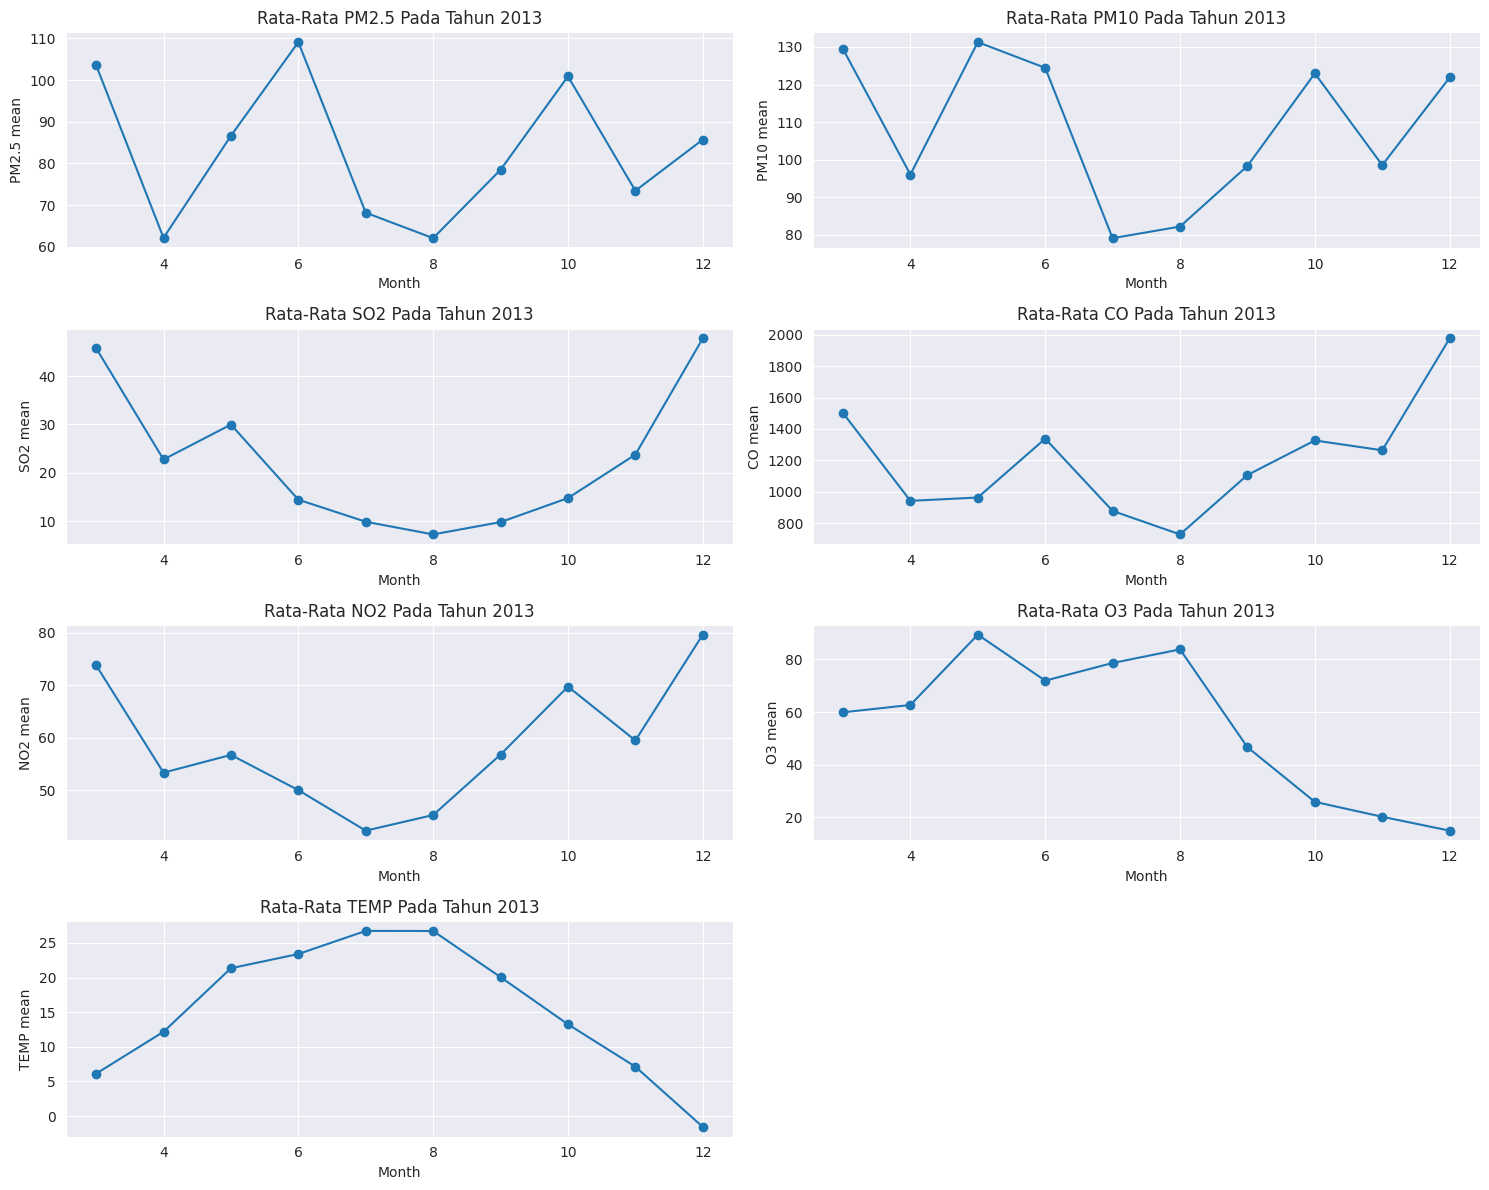

In [ ]:
data_2013=visual.loc[2013]

variables=["PM2.5","PM10","SO2","CO","NO2","O3","TEMP"]
fig,axes=plt.subplots(4,2,figsize=(15,12))
axes=axes.flatten()

for i, var in enumerate (variables):
  axes[i].plot(data_2013.index,data_2013[var],marker='o')
  axes[i].set_title(f'Rata-Rata {var} Pada Tahun 2013')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Visualisasi pada tahun 2014

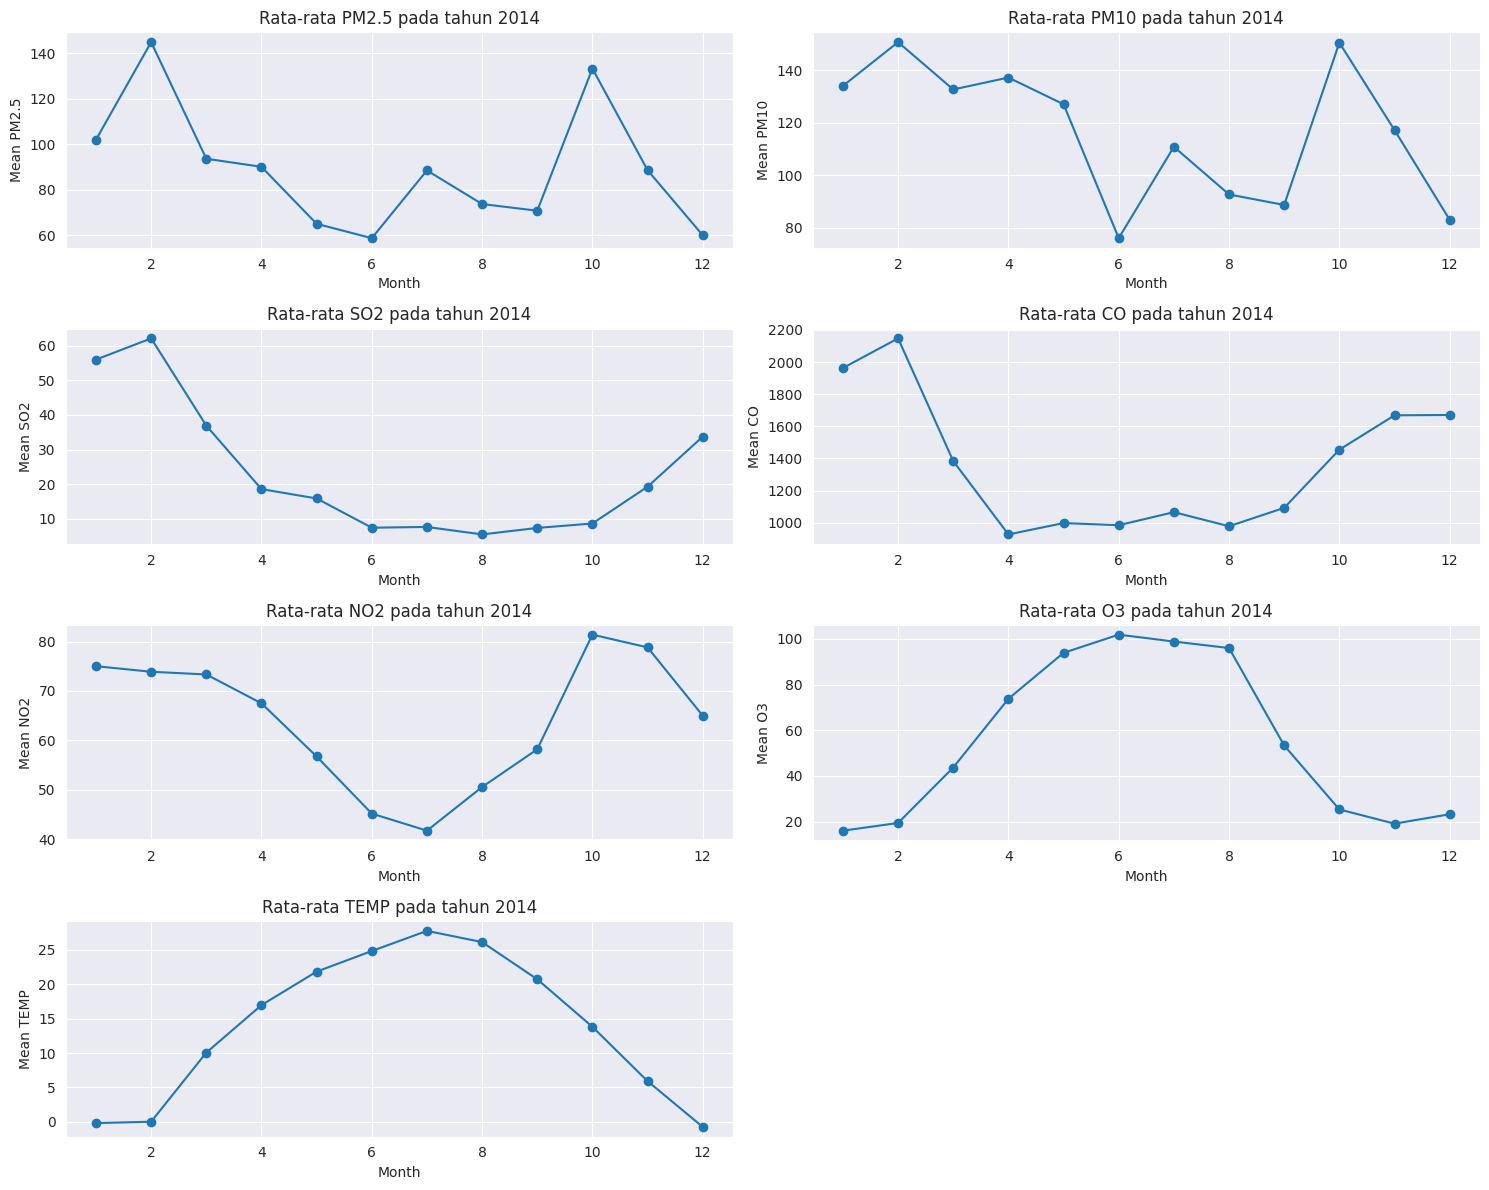

In [ ]:
data_2014=visual.loc[2014]
variables=["PM2.5","PM10","SO2","CO","NO2","O3","TEMP"]
fig,axes= plt.subplots(4,2,figsize=(15,12))

axes=axes.flatten()
for i,var in enumerate (variables):
  axes[i].plot(data_2014.index,data_2014[var],marker="o")
  axes[i].set_title(f'Rata-rata {var} pada tahun 2014')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'Mean {var}')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Visualisasi pada tahun 2015

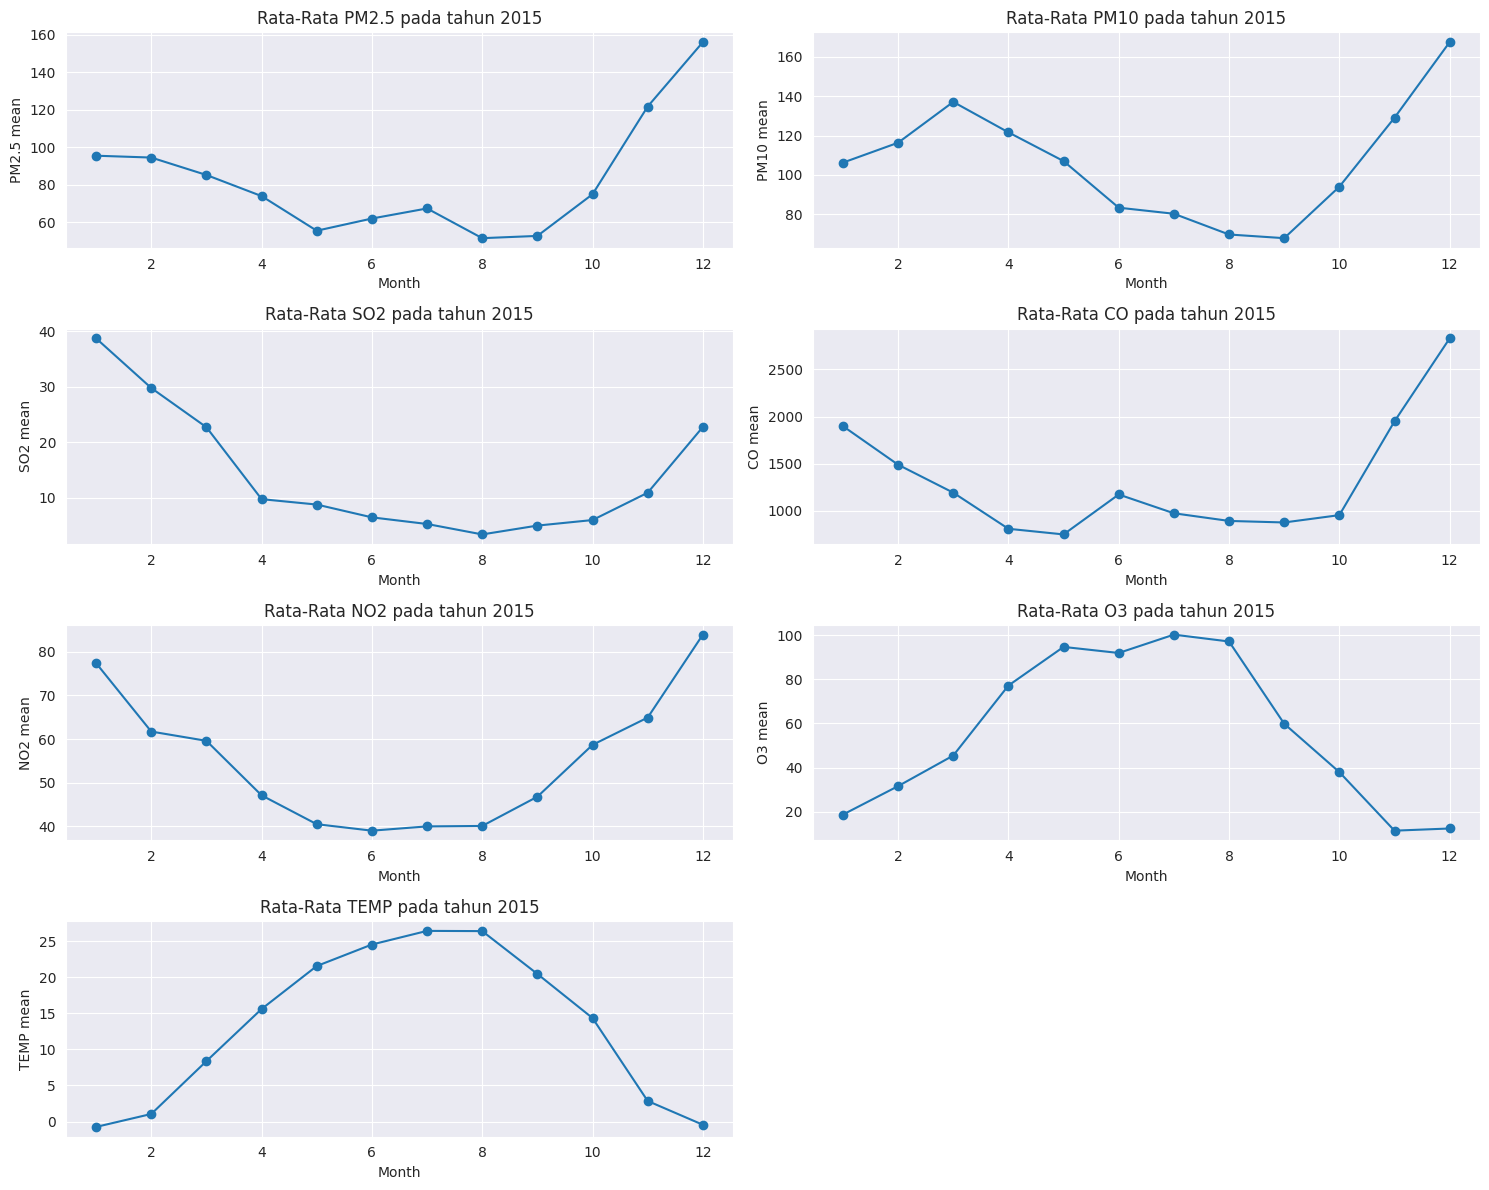

In [ ]:
data_2015=visual.loc[2015]

variables=["PM2.5","PM10","SO2","CO","NO2","O3","TEMP"]

fig,axes=plt.subplots(4,2,figsize=(15,12))
axes=axes.flatten()

for i,var in enumerate (variables):
  axes[i].plot(data_2015.index,data_2015[var],marker="o")
  axes[i].set_title(f'Rata-Rata {var} pada tahun 2015')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean')


fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


Data tahun 2016

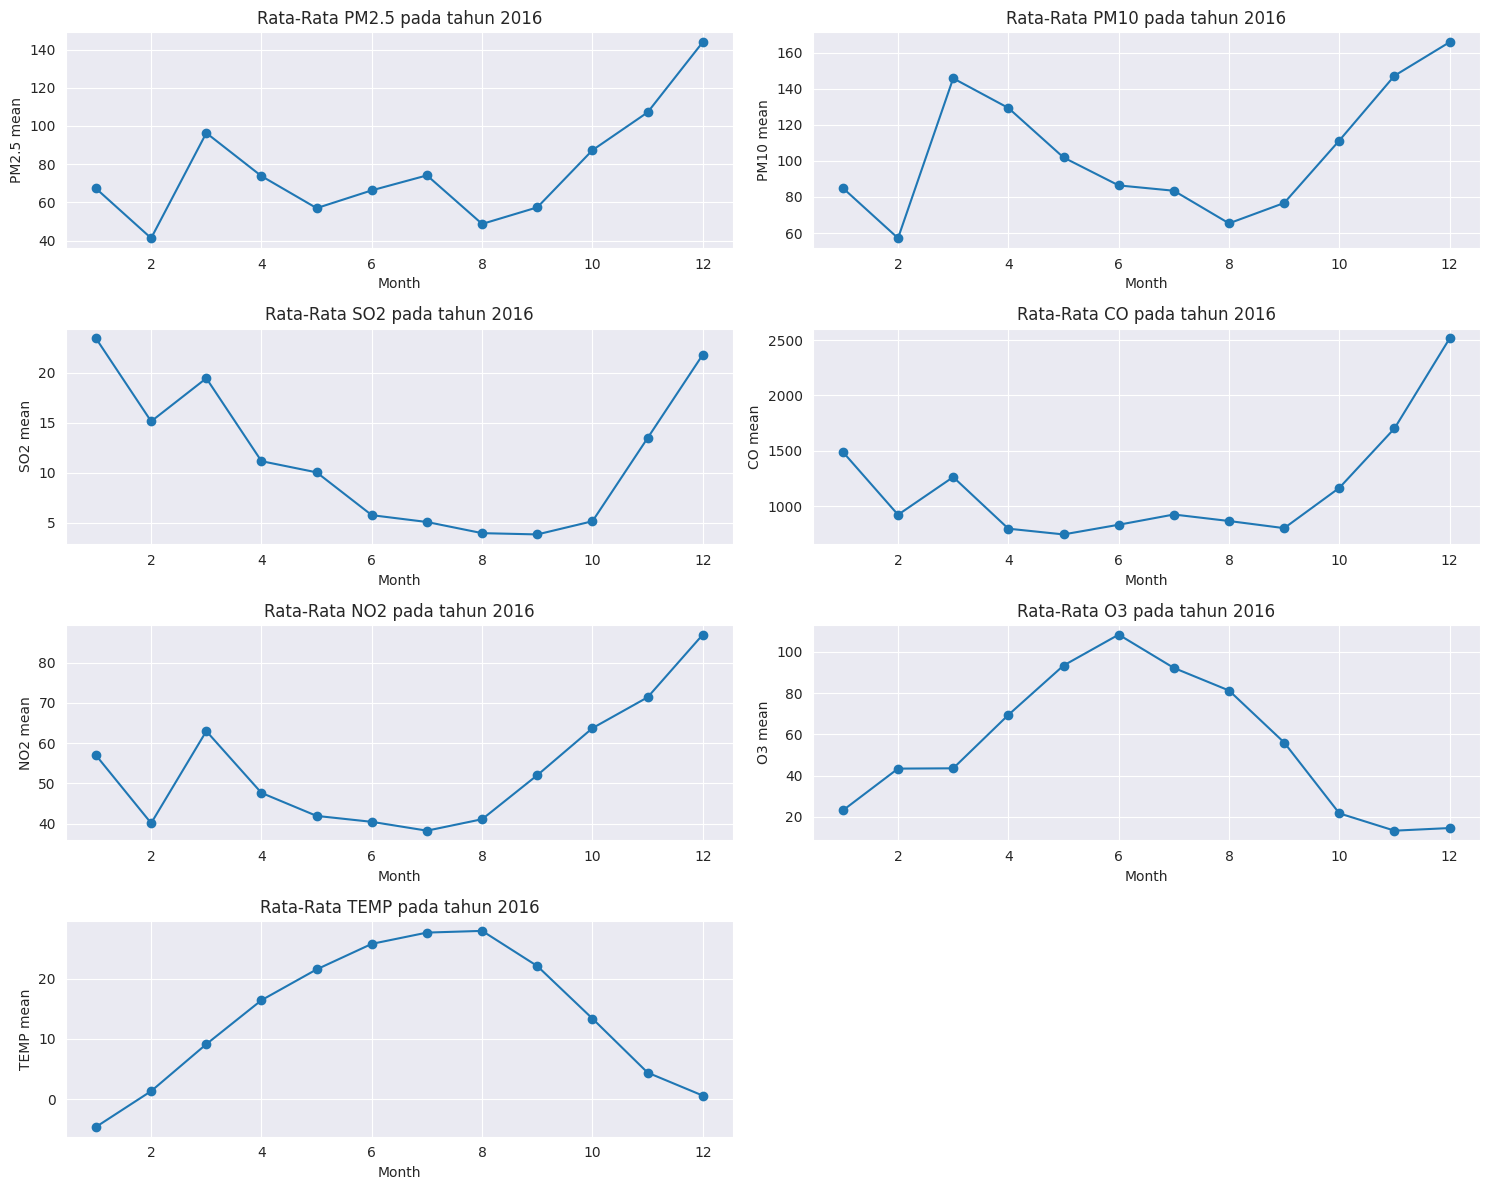

In [ ]:
data_2016=visual.loc[2016]

variables=["PM2.5","PM10","SO2","CO","NO2","O3","TEMP"]

fig,axes=plt.subplots(4,2,figsize=(15,12))
axes=axes.flatten()

for i, var in enumerate (variables):
  axes[i].plot(data_2016.index,data_2016[var],marker="o")
  axes[i].set_title(f'Rata-Rata {var} pada tahun 2016')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Data Tahun 2017

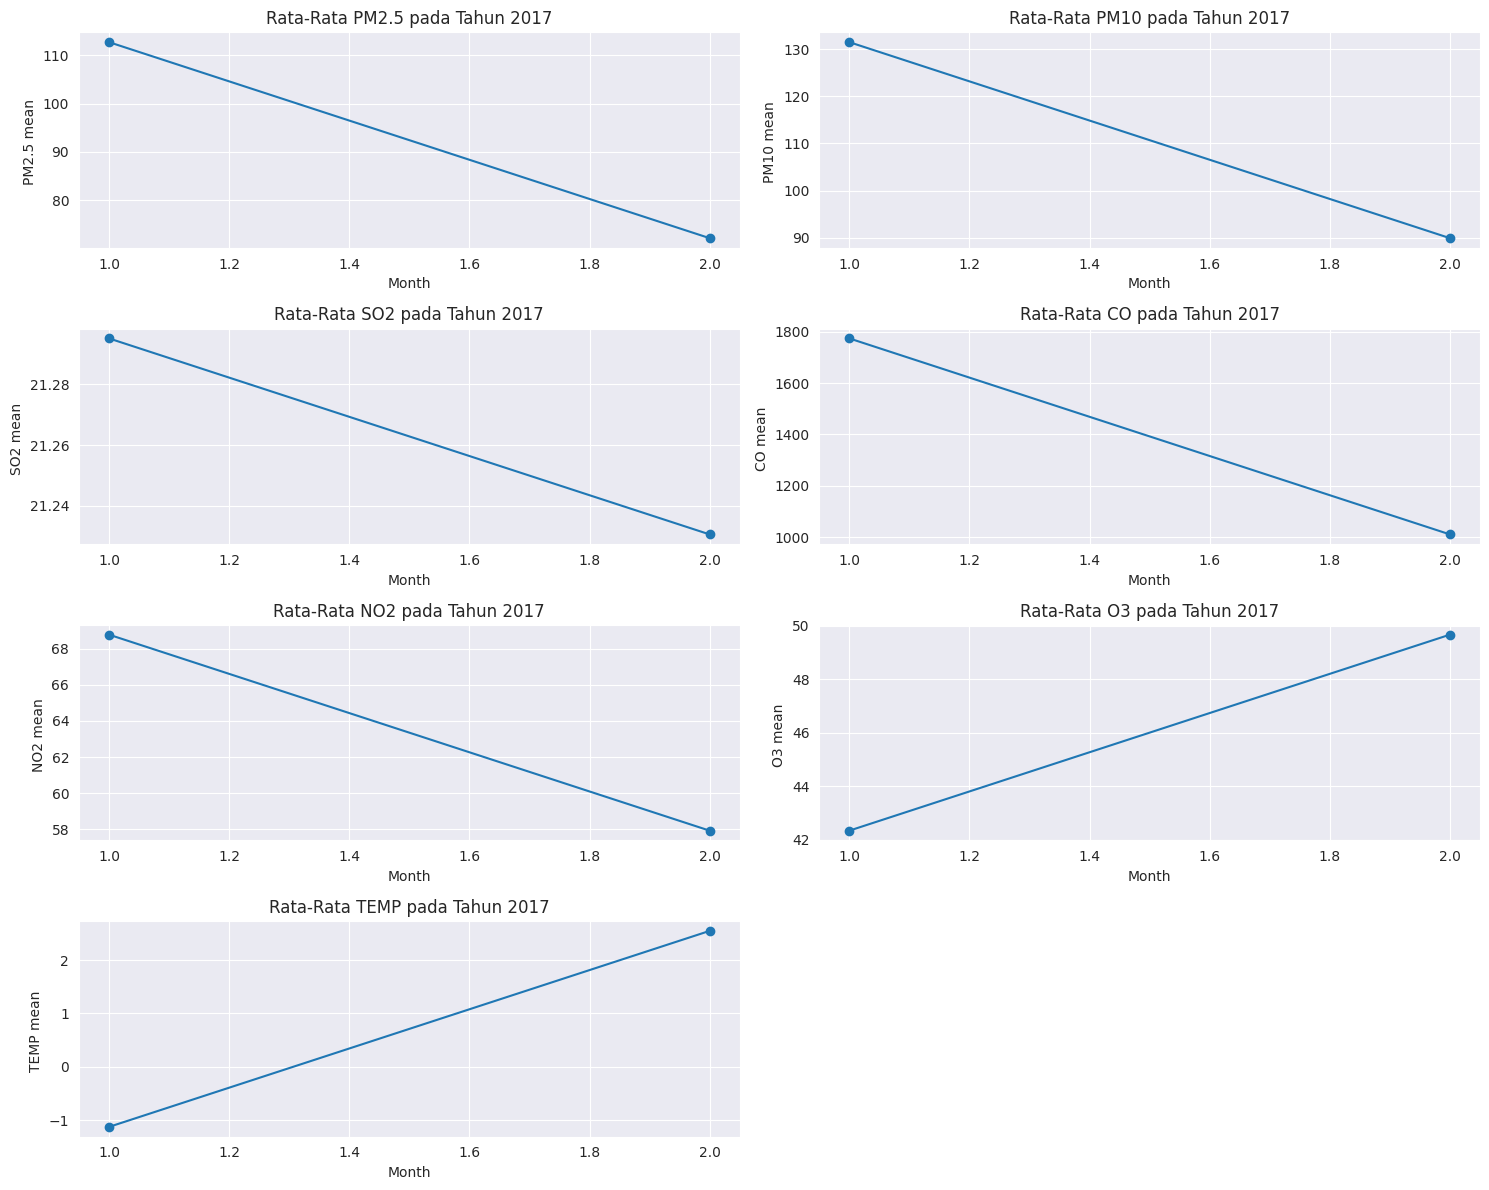

In [ ]:
data_2017=visual.loc[2017]
variables=["PM2.5","PM10","SO2","CO","NO2","O3","TEMP"]
fig,axes=plt.subplots(4,2,figsize=(15,12))
axes=axes.flatten()

for i,var in enumerate (variables):
  axes[i].plot(data_2017.index,data_2017[var],marker="o")
  axes[i].set_title(f'Rata-Rata {var} pada Tahun 2017')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean ')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Pertanyaan 2:Apa saja parameter yang berhubungan terhadap kualitas udara di kota Guanyuan

Menentukan korelasi setiap faktor kualitas udara di kota Guanyuan

In [ ]:
core=airqu_df[['PM2.5','PM10','SO2','O3','CO','NO2','TEMP','WSPM']]
core.corr()

,PM2.5,PM10,SO2,O3,CO,NO2,TEMP,WSPM
PM2.5,1.000000,0.897309,0.492045,-0.145761,0.800624,0.693883,-0.133084,-0.285300
PM10,0.897309,1.000000,0.472098,-0.105211,0.713095,0.660255,-0.095603,-0.194396
SO2,0.492045,0.472098,1.000000,-0.181543,0.568284,0.523129,-0.361197,-0.136197
O3,-0.145761,-0.105211,-0.181543,1.000000,-0.309041,-0.511333,0.611711,0.304000
CO,0.800624,0.713095,0.568284,-0.309041,1.000000,0.733687,-0.312413,-0.308973
NO2,0.693883,0.660255,0.523129,-0.511333,0.733687,1.000000,-0.324611,-0.455277
TEMP,-0.133084,-0.095603,-0.361197,0.611711,-0.312413,-0.324611,1.000000,0.024770
WSPM,-0.285300,-0.194396,-0.136197,0.304000,-0.308973,-0.455277,0.024770,1.000000


Melakukan visualisasi kadar kosentrasi CO dengan kadar PM2.5 dan PM10

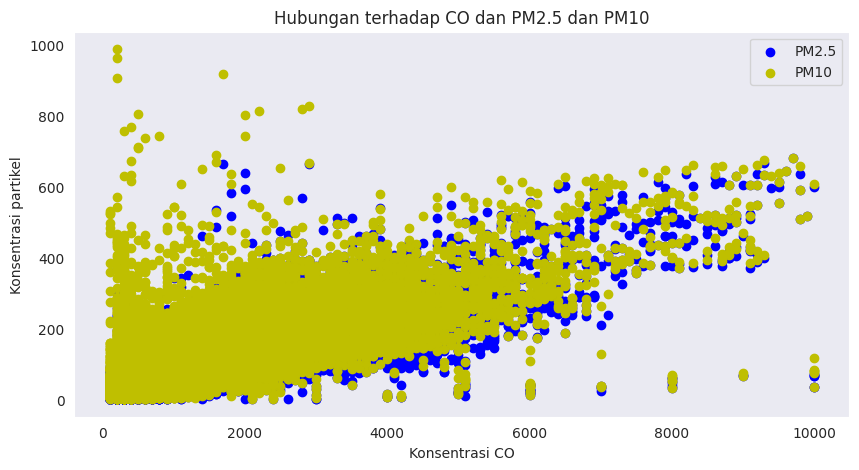

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(airqu_df['CO'],airqu_df['PM2.5'],marker='o',linestyle='-',color='b',label='PM2.5')
plt.scatter(airqu_df['CO'],airqu_df['PM10'],marker='o',linestyle='-',color='y',label='PM10')

plt.title('Hubungan terhadap CO dan PM2.5 dan PM10')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Konsentrasi partikel')

plt.legend()
plt.grid()
plt.show()

**Insight:**
- Faktor yang mempengaruhi nilai CO adalah PM2.5 dan PM10
- Dalam 5 tahun terakhir terdapat faktor yang mengalami kenaikan yaitu pada tahun 2016 kenaikan kadar CO dan PM2.5 yang dapat mempengaruhi kualitas udara

Bagaimana Perbandingan kualitas udara dalam 5 tahun terakhir?

Tata cara perhitungan ISPU (Indeks Standar Pencemaran Udara) yaitu:

1.   INDEKS STANDAR PENCEMAR UDARA (ISPU) SEBAGAI INFORMASI MUTU UDARA AMBIEN DI INDONESIA [Link](https://ditppu.menlhk.go.id/portal/read/indeks-standar-pencemar-udara-ispu-sebagai-informasi-mutu-udara-ambien-di-indonesia)
2.   Computation of the Pollutant Standards Index (PSI)[Here](https://www.haze.gov.sg/docs/default-source/faq/computation-of-the-pollutant-standards-index-%28psi%29.pdftata)



Melakukan pembacaan Dataframe yang sudah di bersihkan yaitu clean.csv

In [ ]:
df=pd.read_csv('/content/clean.csv')

Meninjau kembali dataframe untuk penentuan ambang batas polutan

In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000
mean,18055.294300,2014.731519,6.411555,15.718780,11.548368,83.101051,108.974559,17.263085,57.698591,1265.709760,55.832982,13.707451,1011.856881,3.242758,0.069377,1.719462
std,9974.437594,1.148731,3.426927,8.842654,6.935752,81.448350,91.583482,23.551127,35.113587,1157.718045,57.733303,11.423989,10.436685,13.767873,0.911777,1.198474
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,9790.500000,2014.000000,3.000000,8.000000,6.000000,23.000000,40.000000,3.000000,30.000000,500.000000,7.000000,3.200000,1003.300000,-8.100000,0.000000,0.900000
50%,18323.000000,2015.000000,6.000000,16.000000,12.000000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.800000,1011.200000,4.100000,0.000000,1.400000
75%,26555.000000,2016.000000,9.000000,23.000000,18.000000,115.000000,149.000000,21.000000,78.000000,1600.000000,81.050000,23.400000,1020.300000,15.800000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,987.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Melakukan Perhitungan ISPU untuk PM2.5 dan menambahkan kolom baru ISPU PM2.5

In [ ]:
def ispu_pm25(pm25):
  batas_pm25=[0,15.5,55.4,150.4,250.4,350,550,650,750]
  batas_ispu=[0,50,100,150,200,300,400,500,600]

  for i in range(len(batas_pm25)-1):
    if batas_pm25[i] <= pm25 < batas_pm25[i+1]:
      ispu_pm25=((batas_ispu[i+1]-batas_ispu[i])/ (batas_pm25[i+1]-batas_pm25[i])*(pm25 - batas_pm25[i])) +batas_ispu[i]
      return round(ispu_pm25)

df['ISPU PM2.5']=df['PM2.5'].apply(ispu_pm25)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,ISPU PM2.5
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01,13
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01,13
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01,10
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01,10
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01,10


Melakukan perhitungan ISPU untuk PM10 dan menambahkan ISPU PM10 pada dataframe

In [ ]:
def ispu_pm10(pm10):
  batas_pm10=[0,50,150,350,420,500,600,700,800,900,1000]
  batas_ispu=[0,50,100,150,200,300,400,500,600,700,800]

  for i in range(len(batas_pm10)-1):
    if batas_pm10[i] <= pm10 < batas_pm10[i+1]:
      ispu_pm10= ((batas_ispu[i+1]- batas_ispu[i])/ (batas_pm10[i+1]- batas_pm10[i])* (pm10 -batas_pm10[i])) + batas_ispu[i]
      return round(ispu_pm10)

df['ISPU PM10']=df['PM10'].apply(ispu_pm10)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,ISPU PM2.5,ISPU PM10
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,...,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01,13,4
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,...,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01,13,4
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,...,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01,10,3
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,...,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01,10,6
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,...,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01,10,6


Melakukan perhitungan ISPU S02 dan menambahkan kolom baru ISPU SO2

In [ ]:
def ispu_so2(so2):

  batas_so2=[0,52,180,400,800,1200]
  batas_ispu=[0,50,100,200,300,400]

  for i in range(len(batas_so2)-1):
    if batas_so2[i] <= so2 < batas_so2[i+1]:
      ispu_so2=((batas_ispu[i+1] - batas_ispu[i]) / (batas_so2[i+1] - batas_so2[i]) *(so2-batas_so2[i])) + batas_ispu[i]
      return round(ispu_so2)

df['ISPU SO2']=df['SO2'].apply(ispu_so2)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,PRES,DEWP,RAIN,wd,WSPM,station,date,ISPU PM2.5,ISPU PM10,ISPU SO2
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,...,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01,13,4,13
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,...,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01,13,4,12
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,...,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01,10,3,10
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,...,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01,10,6,7
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,...,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01,10,6,5


Melakukan perhitungan ISPU NO2 dan menambkan kolom baru yaitu ISPU NO2

In [ ]:
def ispu_NO2(no2):
  batas_no2=[0,80,200,1130,2260,3000]
  batas_ispu=[0,50,100,200,300,400]

  for i in range(len(batas_no2)-1):
    if batas_no2[i] <= no2 < batas_no2[i+1]:
      ispu_no2=((batas_ispu[i+1]-batas_ispu[i])/ (batas_no2[i+1]-batas_no2[i]) * (no2-batas_no2[i])) + batas_ispu[i]
      return round(ispu_no2)


df['ISPU NO2']=df['NO2'].apply(ispu_NO2)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,DEWP,RAIN,wd,WSPM,station,date,ISPU PM2.5,ISPU PM10,ISPU SO2,ISPU NO2
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,...,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01,13,4,13,12
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,...,-18.2,0.0,N,4.7,Guanyuan,2013-03-01,13,4,12,11
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,...,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01,10,3,10,12
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,...,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01,10,6,7,15
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,...,-19.5,0.0,N,2.0,Guanyuan,2013-03-01,10,6,5,9


Melakukan perhitungan ISPU CO dan menambahkan hasil perhitungan ke dataframe

In [ ]:
def ispu_co(co):
  batas_co=[0,4000,8000,15000,30000,40000]
  batas_ispu=[0,50,100,200,300,400]

  for i in range(len(batas_co)-1):
    if batas_co[i] <= co < batas_co[i+1]:
      ispu_co=((batas_ispu[i+1]-batas_ispu[i])/ (batas_co[i+1]-batas_co[i]) * (co-batas_co[i])) + batas_ispu[i]
      return round(ispu_co)


df['ISPU CO']=df['CO'].apply(ispu_co)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,RAIN,wd,WSPM,station,date,ISPU PM2.5,ISPU PM10,ISPU SO2,ISPU NO2,ISPU CO
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,...,0.0,NNW,4.4,Guanyuan,2013-03-01,13,4,13,12,4
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,...,0.0,N,4.7,Guanyuan,2013-03-01,13,4,12,11,4
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,...,0.0,NNW,5.6,Guanyuan,2013-03-01,10,3,10,12,4
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,...,0.0,NW,3.1,Guanyuan,2013-03-01,10,6,7,15,5
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,...,0.0,N,2.0,Guanyuan,2013-03-01,10,6,5,9,5


Melakukan perhitungan ISPU O3 dan menambahkan hasil perhitungan ke dataframe

In [ ]:
def ispu_o3(o3):
  batas_o3=[0,120,235,400,800,1000]
  batas_ispu=[0,50,100,200,300,400]

  for i in range(len(batas_o3)-1):
    if batas_o3[i] <= o3 < batas_o3[i+1]:
      ispu_o3=((batas_ispu[i+1]-batas_ispu[i])/ (batas_o3[i+1]-batas_o3[i]) * (o3-batas_o3[i])) + batas_ispu[i]
      return round(ispu_o3)


df['ISPU O3']=df['O3'].apply(ispu_o3)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,wd,WSPM,station,date,ISPU PM2.5,ISPU PM10,ISPU SO2,ISPU NO2,ISPU CO,ISPU O3
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,...,NNW,4.4,Guanyuan,2013-03-01,13,4,13,12,4,29
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,...,N,4.7,Guanyuan,2013-03-01,13,4,12,11,4,30
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,...,NNW,5.6,Guanyuan,2013-03-01,10,3,10,12,4,29
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,...,NW,3.1,Guanyuan,2013-03-01,10,6,7,15,5,26
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,...,N,2.0,Guanyuan,2013-03-01,10,6,5,9,5,30


Menampilkan Nilai ISPU 5 Tahun terakhir

In [ ]:
Av_ISPU=df.groupby(by="year").agg({
    "ISPU PM2.5":["mean","max","min"],
    "ISPU PM10":["mean","max","min"],
    "ISPU SO2":["mean","max","min"],
    "ISPU NO2":["mean","max","min"],
    "ISPU CO":["mean","max","min"],
    "ISPU O3":["mean","max","min"]
})
Av_ISPU

ISPU PM2.5           ISPU PM10            ISPU SO2            ISPU NO2  \
            mean  max min       mean  max min       mean  max min       mean   
year                                                                           
2013  103.955486  381  10  71.713789  787   2  18.156842  104   1  34.531212   
2014  107.295751  453  10  75.318398  614   3  19.546938  138   1  38.099476   
2015  102.961098  530  10  70.902570  761   3  12.941238   91   2  33.030607   
2016   98.459466  489  10  70.365104  706   3  11.121543  144   2  32.550742   
2017  103.737443  514  10  71.987823  717   4  19.078387  151   1  37.709285   

                 ISPU CO             ISPU O3           
      max min       mean  max min       mean  max min  
year                                                   
2013  108   1  14.422014   89   1  25.005738  173   0  
2014  103   1  16.973578   95   1  23.271034  171   0  
2015  104   1  16.479206  129   1  23.822430  171   1  
2016  103   1  14.738635  119   1  22.856855  161   1  
2017   99   1  17.553272  101   1  19.191020  204   0

Mengambil Nilia ISPU PM2.5 dan tahun untuk di grouping

In [ ]:
AV_vis=df.groupby("year")["ISPU PM2.5"].mean()
AV_vis

,ISPU PM2.5
year,
2013,103.955486
2014,107.295751
2015,102.961098
2016,98.459466
2017,103.737443


Melakukan hasil visualisasi ISPU setiap tahun

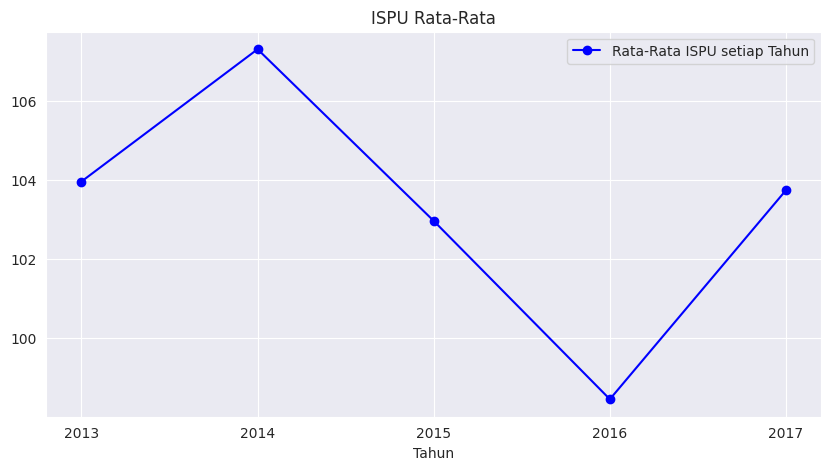

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(AV_vis.index,AV_vis.values,marker='o',linestyle="-",color='b',label="Rata-Rata ISPU setiap Tahun")

plt.title("Rata-Rata ISPU per Tahun")
plt.xlabel('Tahun')
plt.title('ISPU Rata-Rata')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.show()

Insight:

*   Di dapatkan kualitas udara pada 5 tahun terakhir di dominasi oleh polutan PM2.5 dan PM10
* Dari output diatas di dapatkan bahwa polutan yang mempengaruhi Kota Guanyuan yang paling kecil yaitu SO2 dan CO


*  Output diatas menampilkan bahwa nilai ISPU P2.5 memiliki nilai ISPU tertinggi sehingga digunakan sebagai Acuan
*   Didapatkan bahwa pada tahun 2014 memilki rata rata ISPU tertinggi







## Analisis Lanjutan (Opsional)

Mengubah AV_vis menjadi dataframe

In [ ]:
Data=AV_vis.reset_index()

Melakukan binning nilai ISPU

In [ ]:
def tingkatan_ISPU(ISPU):
  if ISPU <=50:
    return "Baik"
  elif ISPU >50 and ISPU <=100:
    return "Sedang"
  elif ISPU >100 and ISPU <=200:
    return "Tidak Sehat"
  elif ISPU <200 and ISPU <=300:
    return "Sangat Tidak Sehat"
  elif ISPU >300:
    return "Berbahaya"

Data['Kategori']=Data["ISPU PM2.5"].apply(tingkatan_ISPU)
Data

,year,ISPU PM2.5,Kategori
0,2013,103.955486,Tidak Sehat
1,2014,107.295751,Tidak Sehat
2,2015,102.961098,Tidak Sehat
3,2016,98.459466,Sedang
4,2017,103.737443,Tidak Sehat


Melakukan Visualisasi nilai ISPU setiap tahun

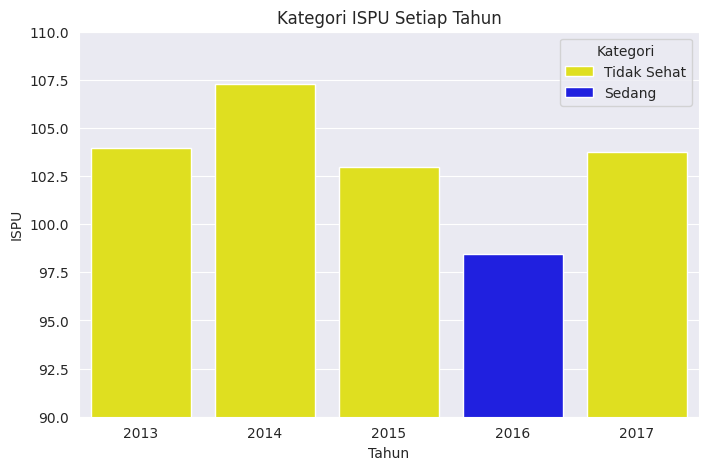

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='ISPU PM2.5',hue='Kategori',data=Data,palette={'Sedang':'blue','Tidak Sehat':'yellow'})

plt.xlabel('Tahun')
plt.ylabel('ISPU')
plt.title('Kategori ISPU Setiap Tahun')
plt.legend(title='Kategori')
plt.ylim(90, 110)
plt.show()

## Conclusion

- Setelah dilakukan visualisasi year terhadap faktor kualitas udara yaitu PM2.5,PM10,SO2,CO,O3,TEMP,PRES terdapat faktor yang terlihat mencolok yaitu kadar CO ,PM2.5 dan PM10
- Setelah dilakukan visualisasi scatter plot bahwa konsentrasi CO memiliki korelasi dengan CO,PM2.5 dan PM10 yang dapat dilihat bahwa semakin ke kanan maka kadar PM2.5 dan PM10 mengalami kenaikan juga


*   PM2.5 dan PM10 adalah faktor polutan paling tinggi setelah dilakukan proses grouping


*   Di Kota Guanyuan pada tahun 2014 memiliki tingkat polusi tertinggi daripada tahun lainnya




